# Assignment 7

## 1. Import Data and Libraries

In [ ]:
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# ! pip install ipykernel
# ! pip install --upgrade nbformat
# ! pip install hvplot


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

### Read File

#### Census CSV

In [18]:
with open('/Users/gersiancollaku/github/spark-seprep/assignments/assignment7/gersian_collaku/census+income/adult.names', 'r') as file:
    adult_names_content = file.read()

adult_names_content


'| This data was extracted from the census bureau database found at\n| http://www.census.gov/ftp/pub/DES/www/welcome.html\n| Donor: Ronny Kohavi and Barry Becker,\n|        Data Mining and Visualization\n|        Silicon Graphics.\n|        e-mail: ronnyk@sgi.com for questions.\n| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).\n| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)\n| 45222 if instances with unknown values are removed (train=30162, test=15060)\n| Duplicate or conflicting instances : 6\n| Class probabilities for adult.all file\n| Probability for the label \'>50K\'  : 23.93% / 24.78% (without unknowns)\n| Probability for the label \'<=50K\' : 76.07% / 75.22% (without unknowns)\n|\n| Extraction was done by Barry Becker from the 1994 Census database.  A set of\n|   reasonably clean records was extracted using the following conditions:\n|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))\n|\n| Prediction task is to determine whet

In [20]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv('/Users/gersiancollaku/github/spark-seprep/assignments/assignment7/gersian_collaku/census+income/adult.data', names=column_names, skipinitialspace=True)
df.head()




,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. EDA

In [21]:
dataset_info = df.info()
summary_statistics = df.describe()
(dataset_info, summary_statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
 count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
 mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
 std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
 75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
 max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
 
        hours-per-week  
 count    32561.000000  
 mean        40.437456  
 std         12.347429  
 min          1.000000  
 25%         40.000000  
 50%         40.000000  
 75%         45.000000  
 max         99.000000  )

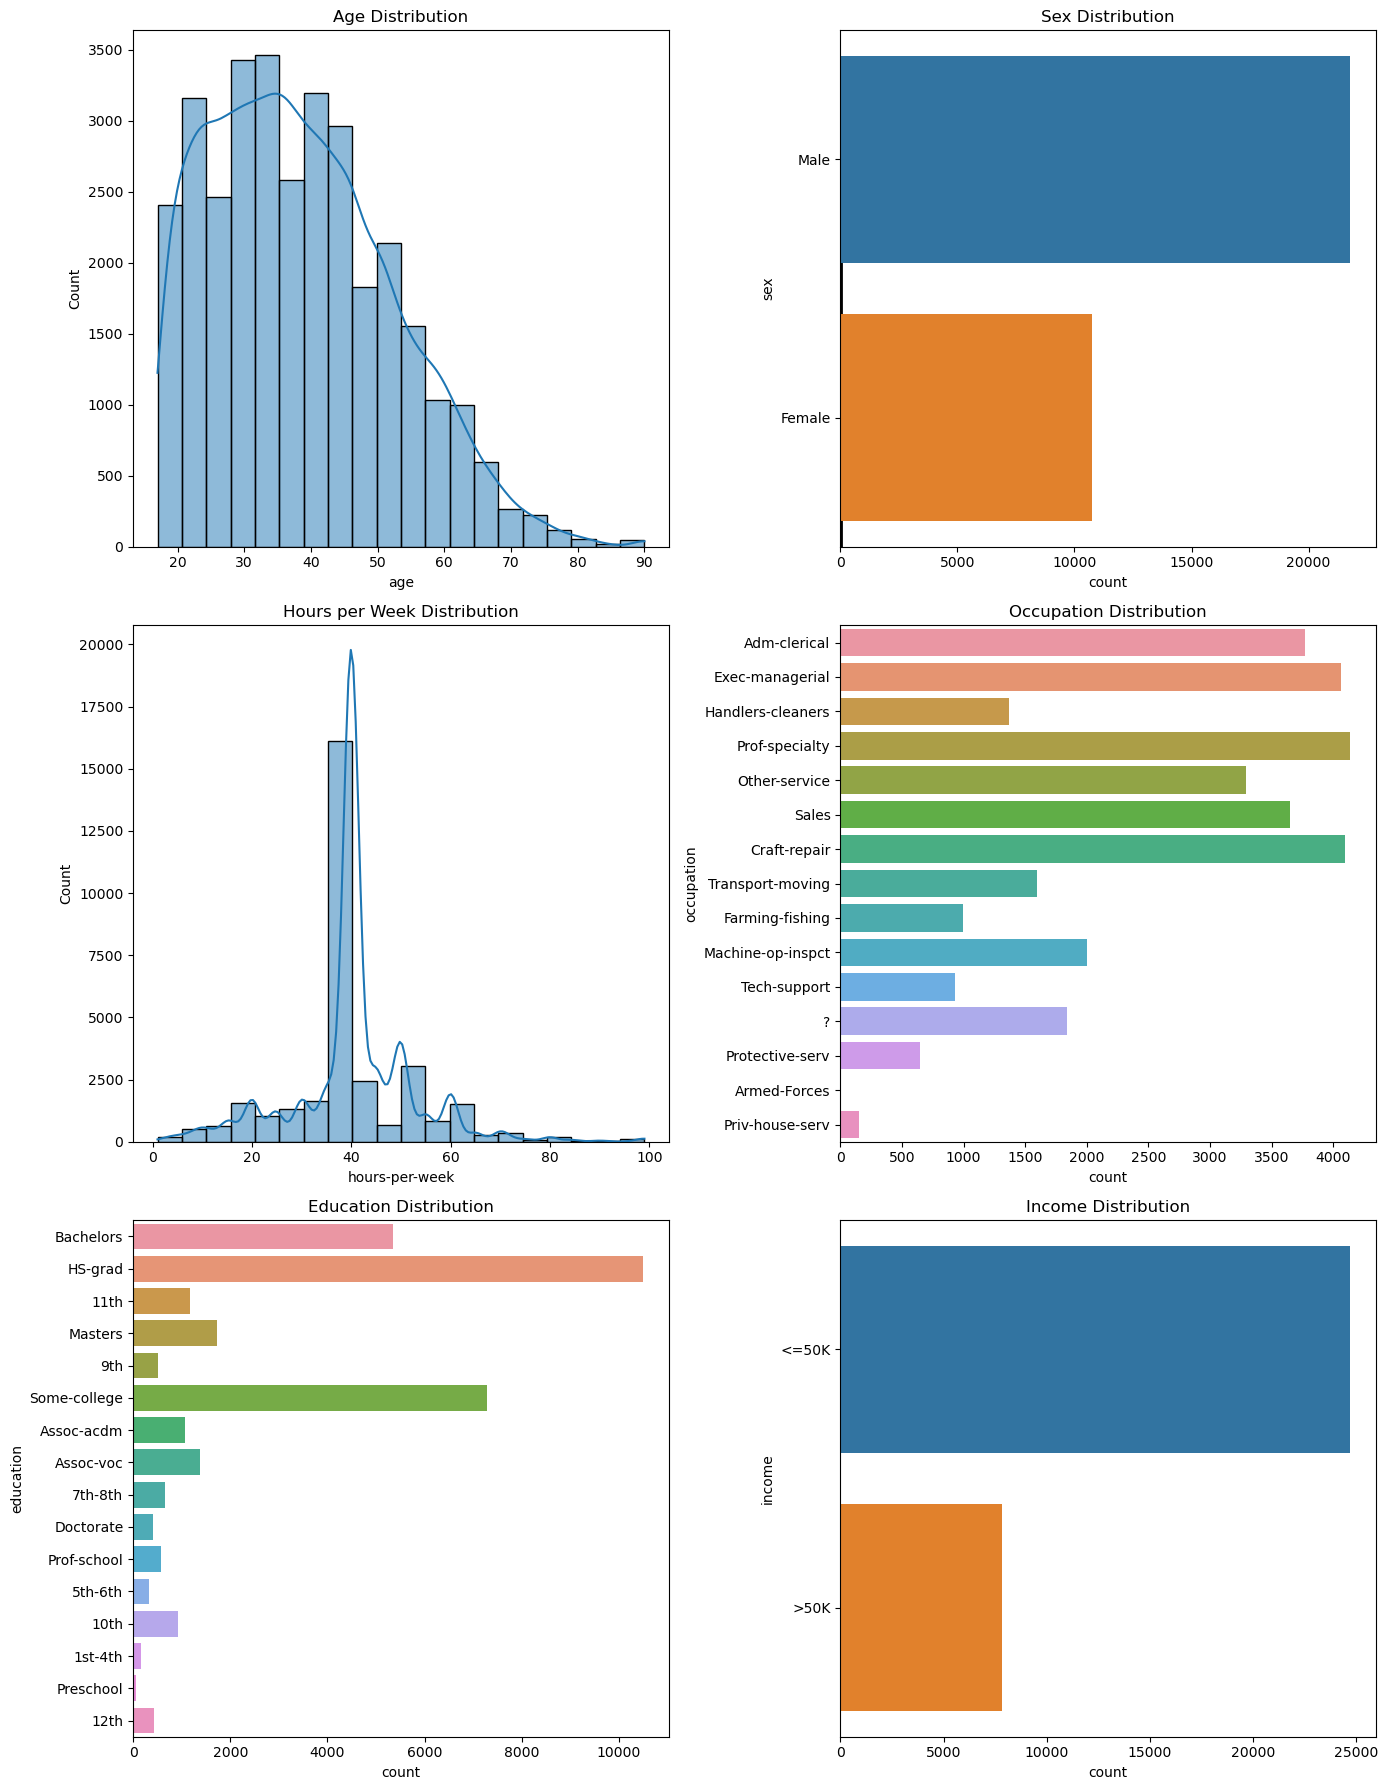

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(14, 18))
#age distribution
sns.histplot(df['age'], bins=20, kde=True, ax=ax[0, 0]).set_title('Age Distribution')

#education distribution
sns.histplot(df['education-num'], bins=16, kde=True, ax=ax[0, 1]).set_title('Education Number Distribution')

#hours worked per week distribution
sns.histplot(df['hours-per-week'], bins=20, kde=True, ax=ax[1, 0]).set_title('Hours per Week Distribution')

#Education distribution
sns.countplot(y='education', data=df, ax=ax[2, 0]).set_title('Education Distribution')

#income distribution
sns.countplot(y='income', data=df, ax=ax[2, 1]).set_title('Income Distribution')

#Occupation distribution
sns.countplot(y='occupation', data=df, ax=ax[1, 1]).set_title('Occupation Distribution')

#sex distribution
sns.countplot(y ='sex', data = df, ax=ax[0, 1]).set_title('Sex Distribution')

plt.tight_layout()
plt.show()


The data is distributed in a way that the majority of the people are between 20 and 50 years old, have a high school or college education, work between 30 and 40 hours per week, and make less than 50k a year. 

# 3. Hypothesis Formulation:

## Hypothesis 1

#### The first hypothesis is that there is a correlation between education level and income. 


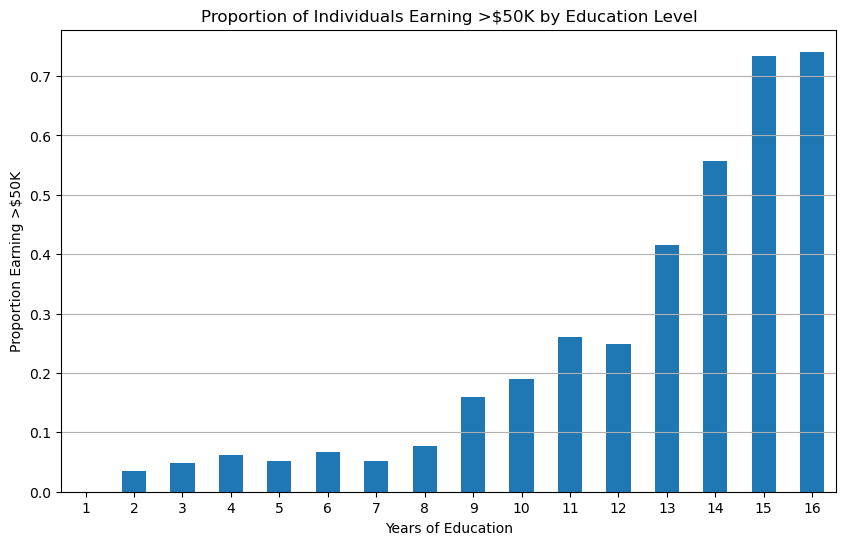

In [37]:
df['income_indicator'] = (df['income'] == '>50K').astype(int)  
income_education_group_original = df.groupby('education-num')['income_indicator'].mean()

plt.figure(figsize=(10, 6))
income_education_group_original.plot(kind='bar')
plt.title('Proportion of Individuals Earning >$50K by Education Level')
plt.xlabel('Years of Education')
plt.ylabel('Proportion Earning >$50K')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




The further down you go in terms of years of education the proportion drastically increases to the point where majority of people past 14 years of education make over 50k a year. 

## Hypothesis 2

#### The second hypothesis is that there is a correlation between gender and income.

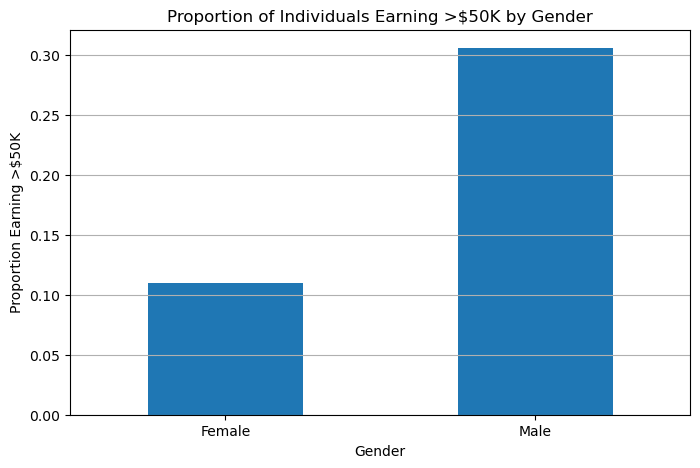

In [36]:
income_gender_group = df.groupby('sex')['income_indicator'].mean()

plt.figure(figsize=(8, 5))
income_gender_group.plot(kind='bar')
plt.title('Proportion of Individuals Earning >$50K by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion Earning >$50K')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


This data shows there is a huge income gap between male and female as almost 3 times the proportion of males make over 50k in comaprison to females.

## Hypothesis 3

#### The third hypothesis shows if there is a correlation between being an inmmigrant and make over 50k.

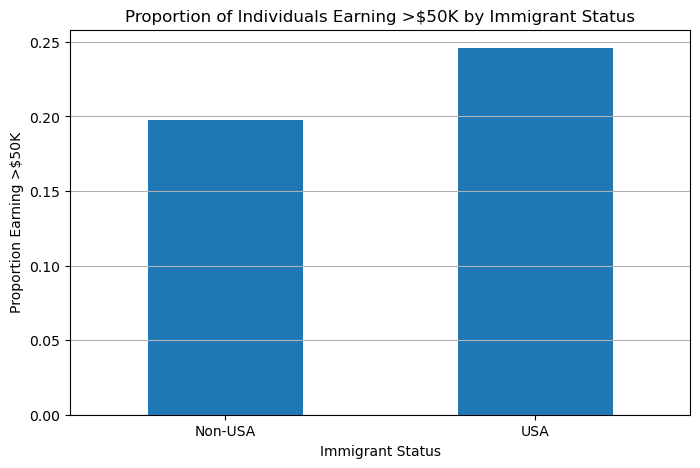

In [41]:
#Seperate people by native country, US and non-US. 
df['immigrant_status'] = df['native-country'].apply(lambda x: 'Non-USA' if x != 'United-States' else 'USA')
income_immigrant_group = df.groupby('immigrant_status')['income_indicator'].mean()

plt.figure(figsize=(8, 5))
income_immigrant_group.plot(kind='bar')
plt.title('Proportion of Individuals Earning >$50K by Immigrant Status')
plt.xlabel('Immigrant Status')
plt.ylabel('Proportion Earning >$50K')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


This data shows that immigrants are slightly (5% difference) less likely to make over 50k in comparison to people born in the US. 